**Done by Aaptha BV and Aryan Sharma**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import cv2
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls gdrive/MyDrive

'[Anime Time] Kimetsu no Yaiba - Demon Slayer - Mugen Train (2020) [1080p][PSN][Dual Audio][HEVC 10bit x265][Eng Sub].mkv'
 AryanS_CV_Apple.pdf
 Datasets
'MatlabProject_ImageRestoration (1).pdf'
'MatlabProject_ImageRestoration (2).pdf'
 MatlabProject_ImageRestoration.pdf
 PES2UG19CS068_C.c
 PES2UG19CS068_H.h
 PES2UG19CS068_S.c


In [ ]:
!unzip gdrive/MyDrive/Datasets/Data.zip

Streaming output truncated to the last 5000 lines.
  inflating: normal/16_Morozov_study_0095_22.png  
  inflating: normal/16_Morozov_study_0095_23.png  
  inflating: normal/16_Morozov_study_0095_24.png  
  inflating: normal/16_Morozov_study_0095_25.png  
  inflating: normal/16_Morozov_study_0095_26.png  
  inflating: normal/16_Morozov_study_0095_27.png  
  inflating: normal/16_Morozov_study_0095_8.png  
  inflating: normal/16_Morozov_study_0095_9.png  
  inflating: normal/16_Morozov_study_0096_12.png  
  inflating: normal/16_Morozov_study_0096_13.png  
  inflating: normal/16_Morozov_study_0096_14.png  
  inflating: normal/16_Morozov_study_0096_15.png  
  inflating: normal/16_Morozov_study_0096_16.png  
  inflating: normal/16_Morozov_study_0096_17.png  
  inflating: normal/16_Morozov_study_0096_18.png  
  inflating: normal/16_Morozov_study_0096_19.png  
  inflating: normal/16_Morozov_study_0096_20.png  
  inflating: normal/16_Morozov_study_0096_21.png  
  inflating: normal/16_Morozov_st

In [ ]:
directory = '/content'
choice = ['covid', 'normal']
dataset = []
img_size = 224

for i in choice:
  #Contains the path of the folder along with each of the image containing folder.
  path_new = os.path.join(directory, i)
  label = choice.index(i)   #Takes 0 as covid and 1 as normal
  print(path_new)
  for image in os.listdir(path_new):
    image_array = cv2.imread(os.path.join(path_new,image), 0)
    dataset.append([cv2.resize(image_array, (img_size,img_size)), label])

/content/covid
/content/normal


Let us check if we can see the images.

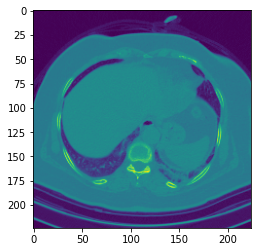

In [ ]:
plt.imshow(dataset[0][0])

Let us check the size of the image by using shape command.

In [ ]:
np.shape(dataset[0][0])

(224, 224)

Let us check the number of rows in the dataset.

In [ ]:
len(dataset)

13820

In [ ]:
#dataset = np.array(dataset)
#indices = np.random.permutation(np.shape(dataset)[0])
#training_idx, test_idx = indices[:9000], indices[9000:]
#training, test = dataset[training_idx,:], dataset[test_idx,:]
#df = pd.DataFrame(dataset, columns=['image', 'result'])
#X = df['image'].values
#y = df['result'].values
#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**Making train and test sets**

In [ ]:
x_train = []
y_train = []
#x_val = []
#y_val = []

for feature, label in dataset:
  x_train.append(feature)
  y_train.append(label)

#for feature, label in test:
#  x_val.append(feature)
#  y_val.append(label)

# Normalize the data
x_train = np.array(x_train)/ 255
#x_test = np.array(x_test)/ 255
y_train = np.array(y_train)
x_train = x_train.reshape(x_train.shape[0], img_size, img_size, 1)

#x_val = x_val.reshape(x_val.shape[0], img_size, img_size, 1)


Making keras model


In [ ]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(img_size,img_size,1)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 64)        0

In [ ]:
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs = 10 , validation_split=0.2)

Epoch 1/10
346/346 [==============================] - 661s 2s/step - loss: 0.6677 - accuracy: 0.5921 - val_loss: 0.8512 - val_accuracy: 0.0000e+00
Epoch 2/10
346/346 [==============================] - 662s 2s/step - loss: 0.5891 - accuracy: 0.6594 - val_loss: 0.7879 - val_accuracy: 0.7214
Epoch 3/10
346/346 [==============================] - 662s 2s/step - loss: 0.5197 - accuracy: 0.8175 - val_loss: 0.6919 - val_accuracy: 0.7438
Epoch 4/10
346/346 [==============================] - 669s 2s/step - loss: 0.4921 - accuracy: 0.8154 - val_loss: 0.6903 - val_accuracy: 0.7435
Epoch 5/10
346/346 [==============================] - 659s 2s/step - loss: 0.4620 - accuracy: 0.8291 - val_loss: 0.6701 - val_accuracy: 0.7435
Epoch 6/10
346/346 [==============================] - 659s 2s/step - loss: 0.4517 - accuracy: 0.8247 - val_loss: 0.6832 - val_accuracy: 0.7424
Epoch 7/10
346/346 [==============================] - 661s 2s/step - loss: 0.4475 - accuracy: 0.8207 - val_loss: 0.6513 - val_accuracy: 0.